#Разведочный анализ

**Описание данных:**


*  *Date (Дата)* — календарная дата наблюдения.
*  *Rented Bike Count (Количество взятых напрокат велосипедов)* — количество арендованных велосипедов за конкретный час. Является основным количественным показателем для прогнозирования.
*  *Hour (Час)* — час наблюдения (вероятно, в формате от 0 до 23).
*  *Temperature (Температура)* — температура воздуха в градусах Цельсия.
*  *Humidity (Влажность)* — относительная влажность воздуха в процентах.
*  *Wind speed (Скорость ветра)* — скорость ветра в метрах в секунду.
*  *Visibility (Видимость)* — дальность видимости, где одна единица равна 10 метрам.
*  *Dew point temperature (Температура точки росы)* — температура, при которой воздух достигает насыщения водяным паром, в градусах Цельсия.
*  *Solar Radiation (Солнечная радиация)* — интенсивность солнечного излучения в мегаджоулях на квадратный метр.
* *Rainfall (Осадки, дождь)* — количество жидких осадков в миллиметрах.
* *Snowfall (Осадки, снег)* — количество твердых осадков (снега) в сантиметрах.
* *Seasons (Времена года)* — категориальная переменная, обозначающая время года (например, весна, лето, осень, зима).
* *Holiday (Праздник)* — бинарный признак, указывающий, является ли день праздничным или выходным.
* *Functioning Day (Рабочий день)* — бинарный показатель, определяющий, функционировала ли система проката велосипедов в этот день.   



**Бизнес-задача:** определить в какой момент аренда велосипедов является наиболее прибыльной (сезон, время, погода). Когда велосипедов нужно больше, а когда меньше?


**Целевая переменная:** Rented Bike Count

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ГП-3/SeoulBikeData.csv', encoding='cp949')

In [16]:
df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [18]:
df['Functioning Day'].count()

np.int64(8760)

In [19]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#### Анализ распределения целевой переменной

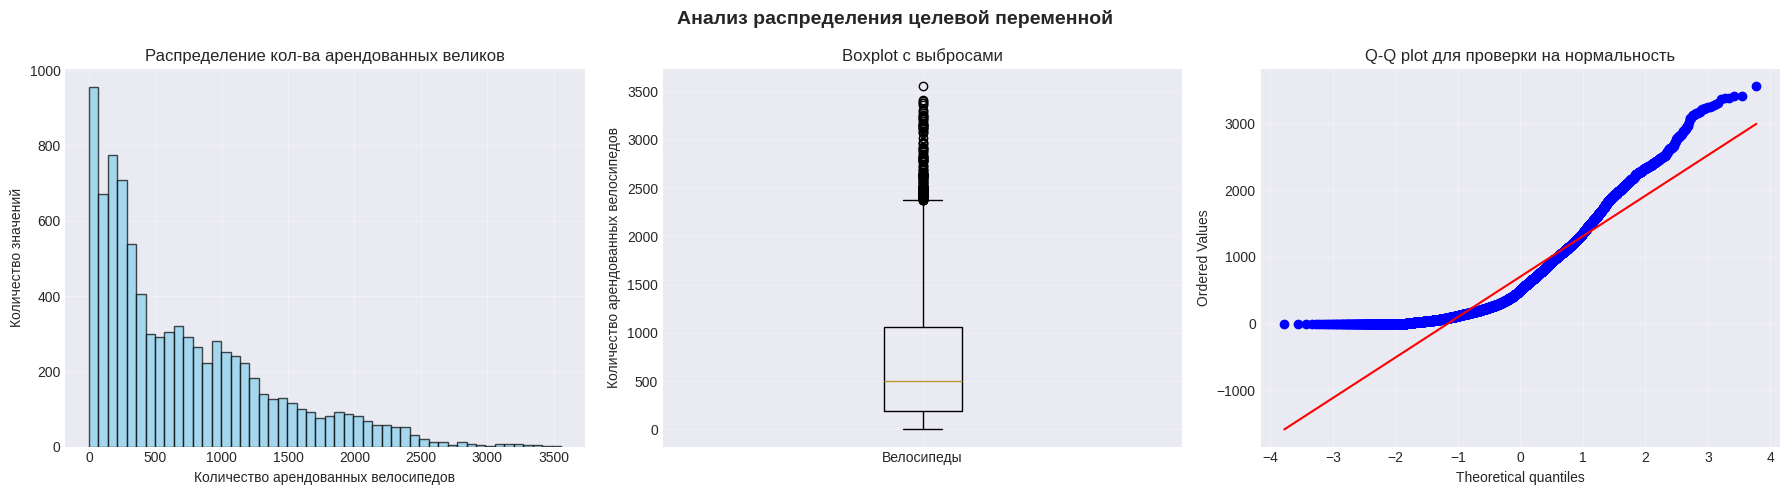

In [20]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig1.suptitle('Анализ распределения целевой переменной', fontsize=14, fontweight='bold')


# классическое распределение
ax1.hist(df['Rented Bike Count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Количество арендованных велосипедов')
ax1.set_ylabel('Количество значений')
ax1.set_title('Распределение кол-ва арендованных великов')
ax1.grid(True, alpha=0.3)

#Boxplot
boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
ax2.boxplot(df['Rented Bike Count'])
ax2.set_ylabel('Количество арендованных велосипедов')
ax2.set_title('Boxplot с выбросами')
ax2.set_xticklabels(['Велосипеды'])
ax2.grid(True, alpha=0.3)


#Q-Q plot для проверки на нормальность
ax3 = plt.subplot(1, 3, 3)
stats.probplot(df['Rented Bike Count'], dist="norm", plot=ax3)
ax3.set_title('Q-Q plot для проверки на нормальность')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

На первом графике видно, что распределение сильно скошенно влево, это достаточно сильно будет смещать анализы в правую часть. Для того, чтобы проще было работать с тестированием гипотез в дальнейшем, имеет смысл применить метод логарифмирования или Winsorization к данным, поскольку это позволит уменьшить дисперсию распределения, хоть пока мы однозначно не знаем коэффициент вариации (CV).

По графику два видно большое кол-во выбросов в верхней половине. Эти значений также следует расмотреть отдельно и понять, что с ними происходит. Логарифмирование также позволит уменьшить влияние выбросов на дальнейший анализ.

По третьему графику понятно, что распределение не является нормальным, поэтому в будущем нам предстоит определеить тип распределения у целевой переменной.

#### Анализ влияния погодных условий

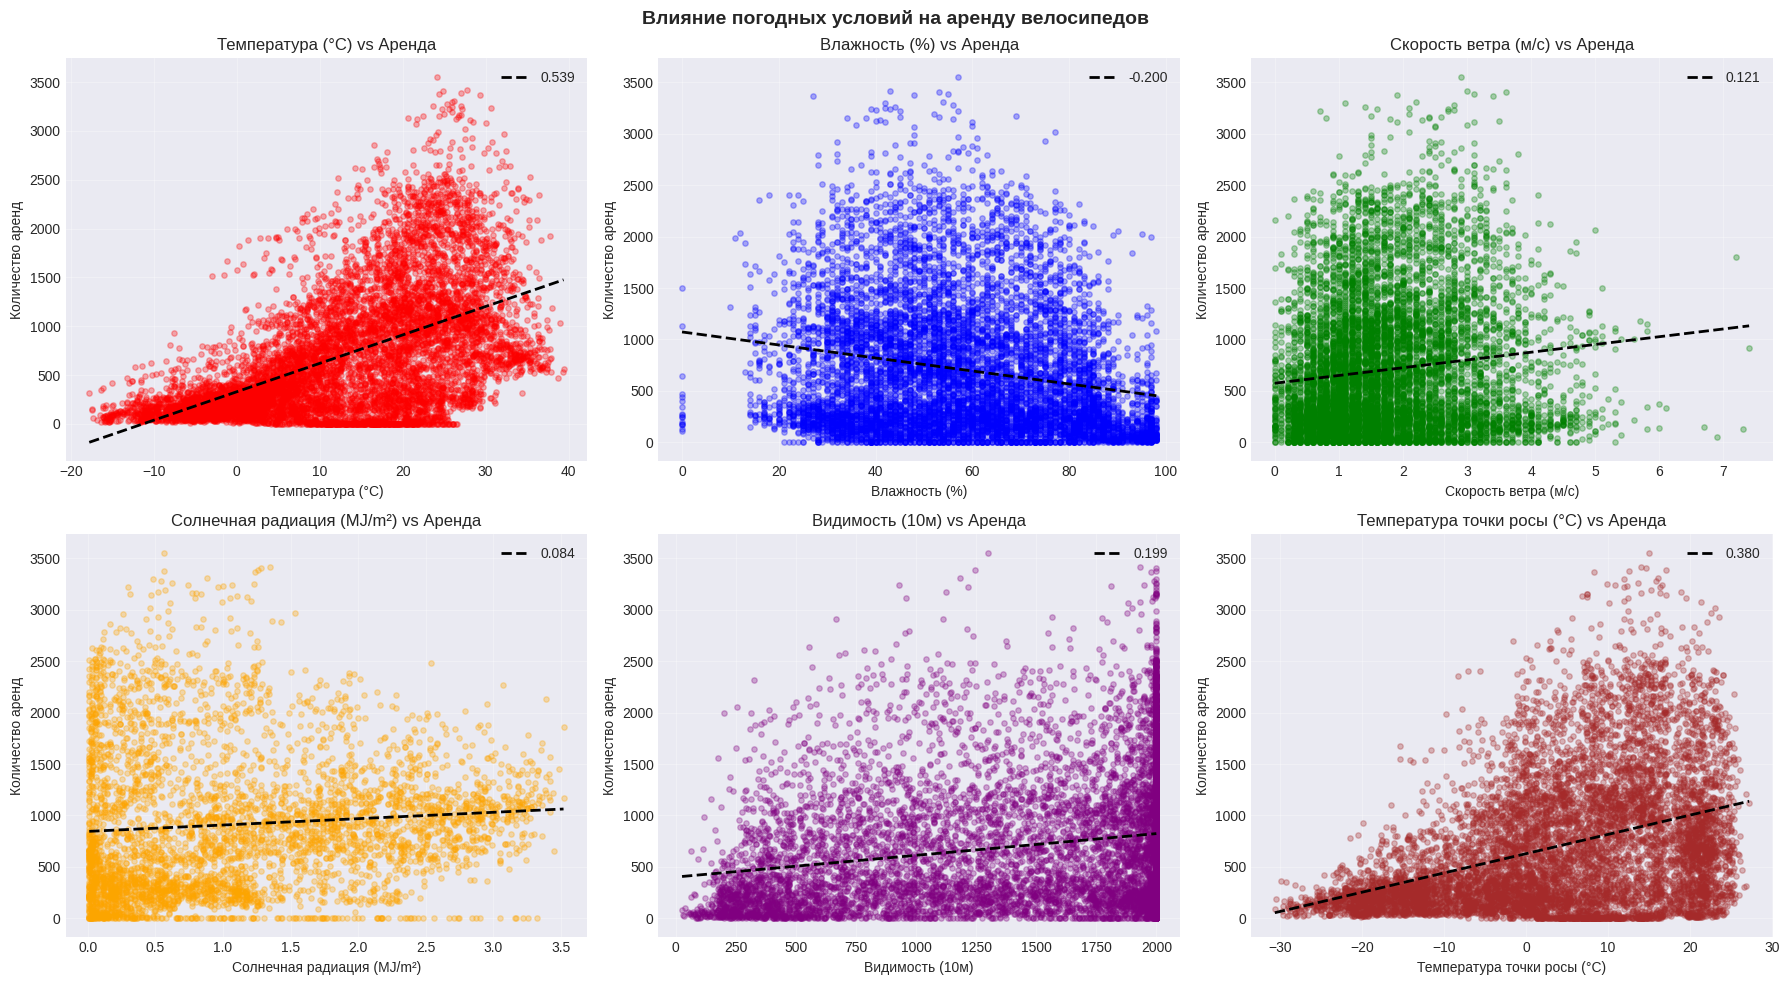

In [21]:
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Влияние погодных условий на аренду велосипедов', fontsize=14, fontweight='bold')

weather_features = [
    ('Temperature(캜)', 'Температура (°C)'),
    ('Humidity(%)', 'Влажность (%)'),
    ('Wind speed (m/s)', 'Скорость ветра (м/с)'),
    ('Solar Radiation (MJ/m2)', 'Солнечная радиация (MJ/m²)'),
    ('Visibility (10m)', 'Видимость (10м)'),
    ('Dew point temperature(캜)', 'Температура точки росы (°C)')
]

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for ax, (col_name, col_label), color in zip(axes2.flat, weather_features, colors):
    plot_data = df if col_name != 'Solar Radiation (MJ/m2)' else df[df[col_name] > 0]

    ax.scatter(plot_data[col_name], plot_data['Rented Bike Count'],
               alpha=0.3, s=15, color=color)
    ax.set(xlabel=col_label, ylabel='Количество аренд', title=f'{col_label} vs Аренда')
    ax.grid(True, alpha=0.3)

    if len(plot_data) > 1:
        z = np.polyfit(plot_data[col_name], plot_data['Rented Bike Count'], 1)
        x_range = np.linspace(plot_data[col_name].min(), plot_data[col_name].max(), 100)
        ax.plot(x_range, np.poly1d(z)(x_range), color='black', linewidth=2, linestyle='--',
                label=f'{np.corrcoef(plot_data[col_name], plot_data["Rented Bike Count"])[0,1]:.3f}')
        ax.legend()

plt.tight_layout()
plt.show()

В первую очередь заметим, что температура имеет самое большое влияние на кол-во аренды велосипедов. Это довольно очевидно, поскольку летом велосипеды более актуальны, нежеди зимой.

Также стоит обратить внимание, что температура точки росы, влажность и видимость имеют умеренное влияние на количество аренд.

Остальные параметры погоды не влияют на целевую переменную.

#### Влияние осадков

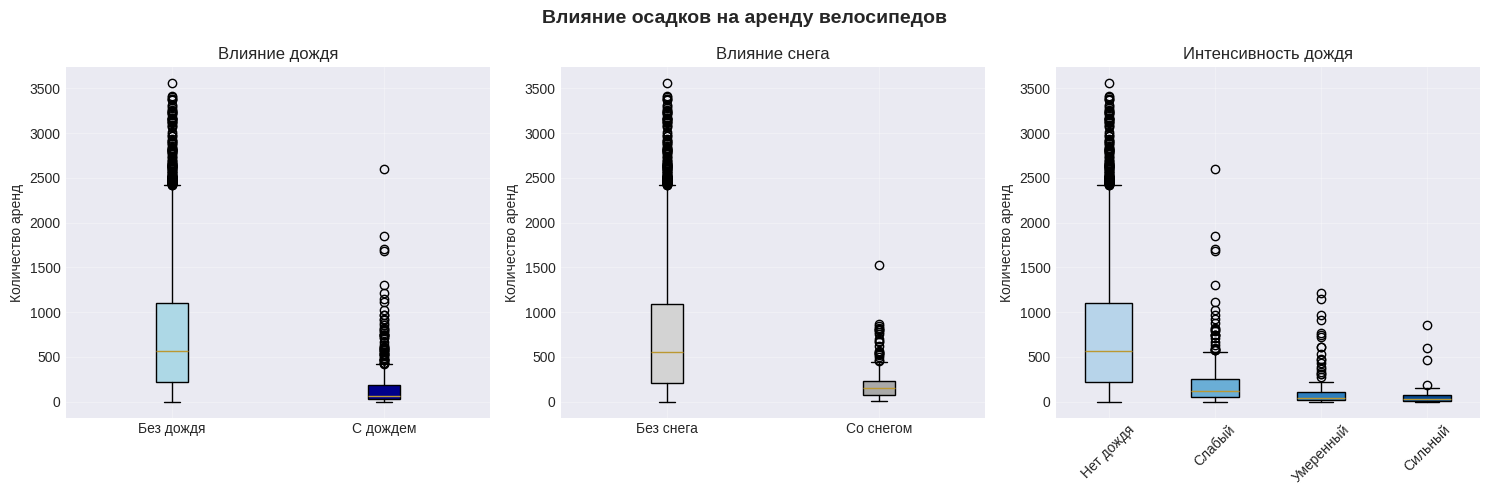

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние осадков на аренду велосипедов', fontsize=14, fontweight='bold')


df['Has_Rain'] = df['Rainfall(mm)'] > 0
df['Has_Snow'] = df['Snowfall (cm)'] > 0

df['Rain_Intensity'] = 'Нет дождя'
df.loc[df['Rainfall(mm)'] > 0, 'Rain_Intensity'] = 'Слабый'
df.loc[df['Rainfall(mm)'] > 1, 'Rain_Intensity'] = 'Умеренный'
df.loc[df['Rainfall(mm)'] > 5, 'Rain_Intensity'] = 'Сильный'

df['Snow_Intensity'] = 'Нет снега'
df.loc[df['Snowfall (cm)'] > 0, 'Snow_Intensity'] = 'Слабый'
df.loc[df['Snowfall (cm)'] > 1, 'Snow_Intensity'] = 'Умеренный'
df.loc[df['Snowfall (cm)'] > 5, 'Snow_Intensity'] = 'Сильный'

# дождик
no_rain = df[df['Has_Rain'] == False]['Rented Bike Count']
with_rain = df[df['Has_Rain'] == True]['Rented Bike Count']

box1 = axes[0].boxplot([no_rain, with_rain], patch_artist=True)

box1['boxes'][0].set_facecolor('lightblue')
box1['boxes'][1].set_facecolor('darkblue')

axes[0].set_xticklabels(['Без дождя', 'С дождем'])
axes[0].set_ylabel('Количество аренд')
axes[0].set_title('Влияние дождя')
axes[0].grid(True, alpha=0.3)

# снеееег
no_snow = df[df['Has_Snow'] == False]['Rented Bike Count']
with_snow = df[df['Has_Snow'] == True]['Rented Bike Count']

box2 = axes[1].boxplot([no_snow, with_snow], patch_artist=True)

box2['boxes'][0].set_facecolor('lightgray')
box2['boxes'][1].set_facecolor('darkgray')

axes[1].set_xticklabels(['Без снега', 'Со снегом'])
axes[1].set_ylabel('Количество аренд')
axes[1].set_title('Влияние снега')
axes[1].grid(True, alpha=0.3)

## интенсивность
if df['Has_Rain'].any():
    data_for_plot = []
    labels_for_plot = []

    for intensity_type in ['Нет дождя', 'Слабый', 'Умеренный', 'Сильный']:
        subset = df[df['Rain_Intensity'] == intensity_type]

        if len(subset) > 0:
            data_for_plot.append(subset['Rented Bike Count'])
            labels_for_plot.append(intensity_type)

    box3 = axes[2].boxplot(data_for_plot, patch_artist=True)

    color_values = [0.3, 0.5, 0.7, 0.9][:len(labels_for_plot)]
    for i in range(len(box3['boxes'])):
        color_value = color_values[i]
        box3['boxes'][i].set_facecolor(plt.cm.Blues(color_value))

    axes[2].set_xticklabels(labels_for_plot, rotation=45)
    axes[2].set_ylabel('Количество аренд')
    axes[2].set_title('Интенсивность дождя')
    axes[2].grid(True, alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'Нет данных об осадках',
                horizontalalignment='center',
                verticalalignment='center',
                transform=axes[2].transAxes)
    axes[2].set_title('Интенсивность дождя')

plt.tight_layout()
plt.show()

По данным графикам видно, что отсутсвие любых осадков заметно увеличивает кол-во арендованных великов. В целом, это достаточно закономерно, поскольку люди используют велосипеды в основном для досуга, поэтому они актуальны только в хорошую погоду.

#### Временные закономерности


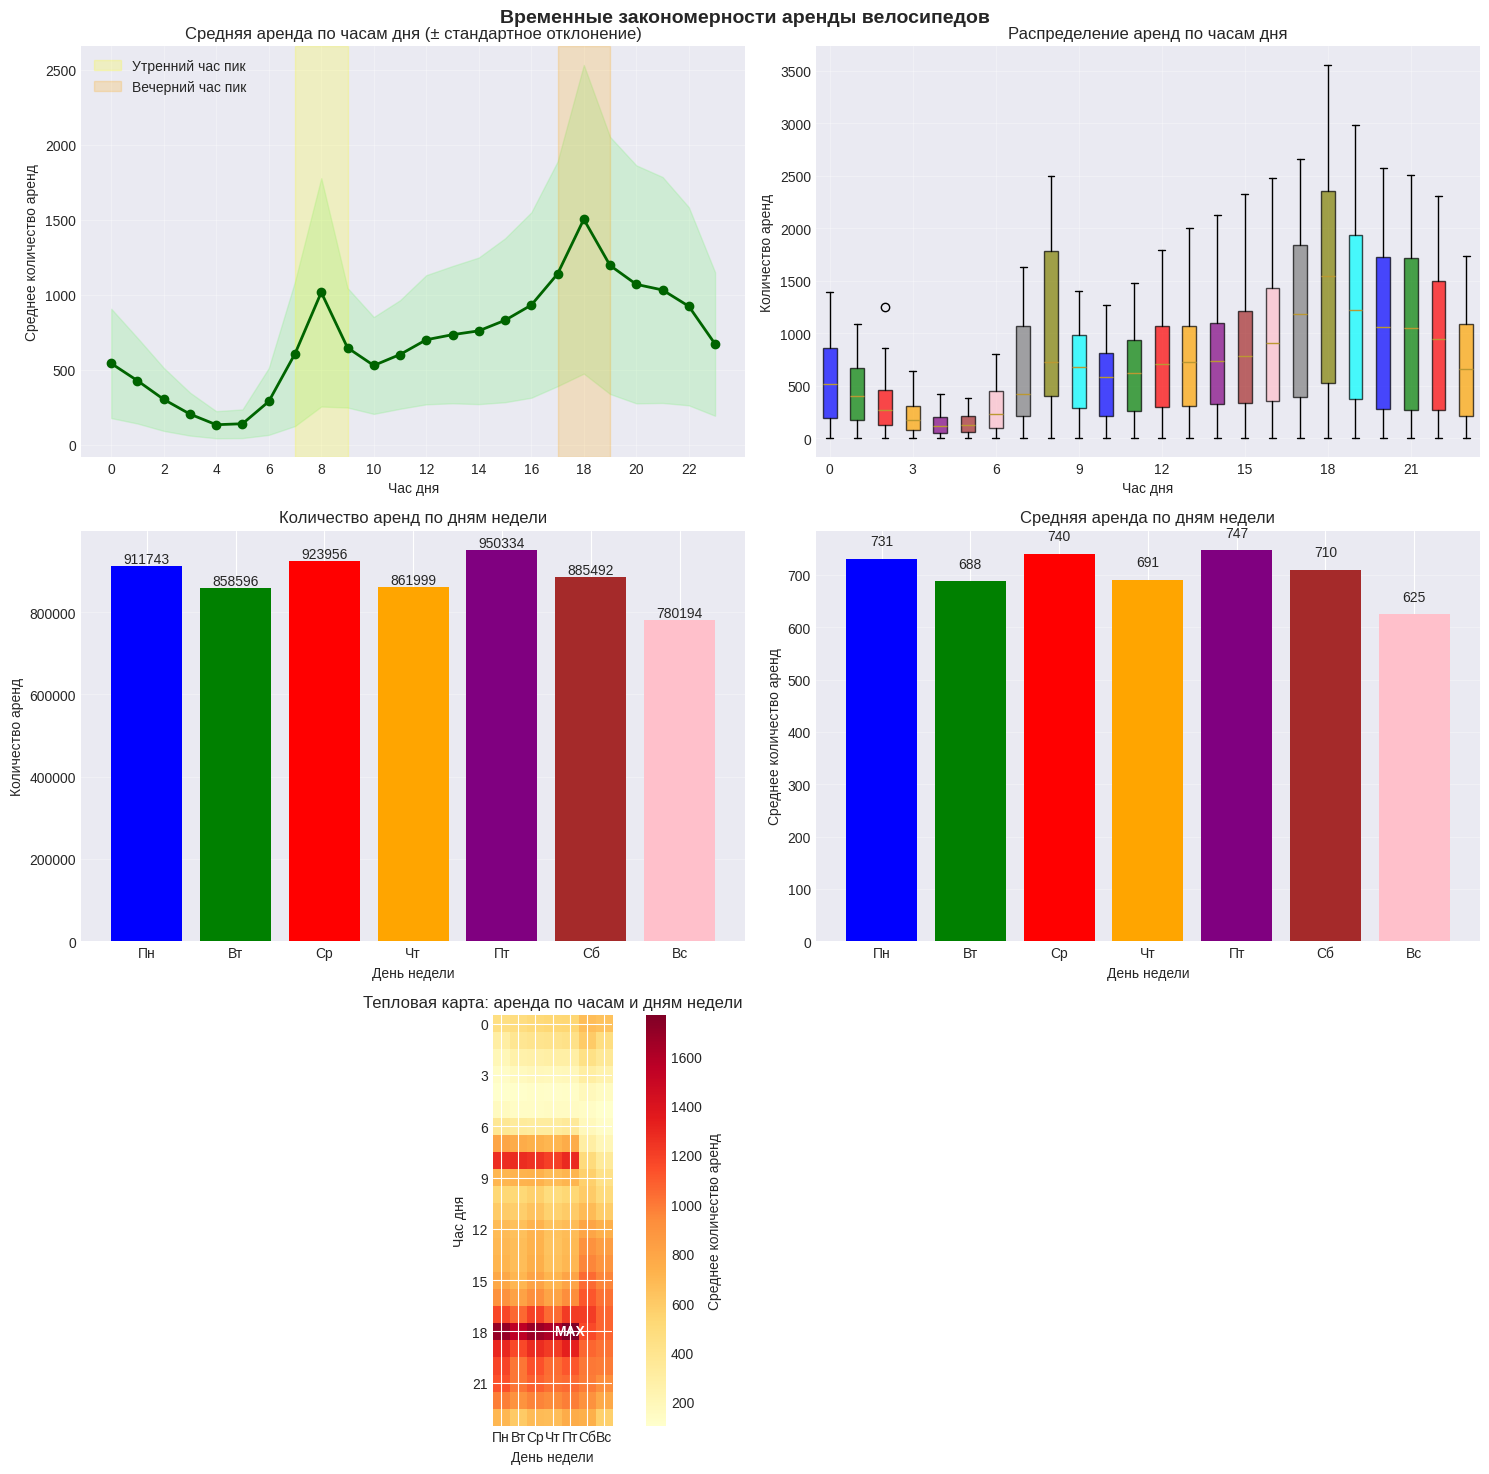

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Временные закономерности аренды велосипедов',
             fontsize=14, fontweight='bold')
# первый
plt.subplot(3, 2, 1)

hours = []
means = []
stds = []

for hour in range(24):
    data_for_hour = df[df['Hour'] == hour]['Rented Bike Count']
    avg = data_for_hour.mean()
    std = data_for_hour.std()

    hours.append(hour)
    means.append(avg)
    stds.append(std)


plt.plot(hours, means, marker='o', linewidth=2, markersize=6, color='darkgreen')

upper = [means[i] + stds[i] for i in range(len(means))]
lower = [means[i] - stds[i] for i in range(len(means))]
plt.fill_between(hours, lower, upper, alpha=0.3, color='lightgreen')

plt.axvspan(7, 9, alpha=0.2, color='yellow', label='Утренний час пик')
plt.axvspan(17, 19, alpha=0.2, color='orange', label='Вечерний час пик')

plt.xlabel('Час дня')
plt.ylabel('Среднее количество аренд')
plt.title('Средняя аренда по часам дня (± стандартное отклонение)')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)
plt.legend()

# второй
plt.subplot(3, 2, 2)

all_hour_data = []
for hour in range(24):
    hour_data = df[df['Hour'] == hour]['Rented Bike Count']
    all_hour_data.append(hour_data)

boxplot = plt.boxplot(all_hour_data, patch_artist=True)

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown',
          'pink', 'gray', 'olive', 'cyan'] * 3

for i, box in enumerate(boxplot['boxes']):
    color_idx = i % len(colors)
    box.set_facecolor(colors[color_idx])
    box.set_alpha(0.7)

plt.xlabel('Час дня')
plt.ylabel('Количество аренд')
plt.title('Распределение аренд по часам дня')
plt.xticks(range(1, 25, 3), range(0, 24, 3))
plt.grid(True, alpha=0.3)

#третий
plt.subplot(3, 2, 3)

df['Date_dt'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['DayOfWeek'] = df['Date_dt'].dt.dayofweek  # 0=понедельник, 6=воскресенье

weekday_count = []
weekday_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

for day_num in range(7):
    day_data = df[df['DayOfWeek'] == day_num]['Rented Bike Count']
    count = day_data.sum()
    weekday_count.append(count)


x_positions = range(len(weekday_labels))
plt.bar(x_positions, weekday_count, color=['blue', 'green', 'red', 'orange',
                                         'purple', 'brown', 'pink'])

for i, value in enumerate(weekday_count):
    plt.text(i, value + 20, f'{value:.0f}', ha='center', va='bottom')

plt.xlabel('День недели')
plt.ylabel('Количество аренд')
plt.title('Количество аренд по дням недели')
plt.xticks(x_positions, weekday_labels)
plt.grid(True, alpha=0.3, axis='y')


# третий
plt.subplot(3, 2, 4)

df['Date_dt'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['DayOfWeek'] = df['Date_dt'].dt.dayofweek  # 0=понедельник, 6=воскресенье

weekday_avg = []
weekday_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

for day_num in range(7):
    day_data = df[df['DayOfWeek'] == day_num]['Rented Bike Count']
    avg = day_data.mean()
    weekday_avg.append(avg)


x_positions = range(len(weekday_labels))
plt.bar(x_positions, weekday_avg, color=['blue', 'green', 'red', 'orange',
                                         'purple', 'brown', 'pink'])

for i, value in enumerate(weekday_avg):
    plt.text(i, value + 20, f'{value:.0f}', ha='center', va='bottom')

plt.xlabel('День недели')
plt.ylabel('Среднее количество аренд')
plt.title('Средняя аренда по дням недели')
plt.xticks(x_positions, weekday_labels)
plt.grid(True, alpha=0.3, axis='y')

# четвертый
plt.subplot(3, 2, 5)

heatmap_data = []

for hour in range(24):
    row = []
    for day_num in range(7):
        filtered_data = df[(df['Hour'] == hour) & (df['DayOfWeek'] == day_num)]
        avg_value = filtered_data['Rented Bike Count'].mean()
        row.append(avg_value)
    heatmap_data.append(row)

heatmap = plt.imshow(heatmap_data, cmap='YlOrRd')

plt.xlabel('День недели')
plt.ylabel('Час дня')
plt.title('Тепловая карта: аренда по часам и дням недели')
plt.xticks(range(7), weekday_labels)
plt.yticks(range(0, 24, 3), range(0, 24, 3))

plt.colorbar(heatmap, label='Среднее количество аренд')

## ищем макс
max_value = 0
max_hour = 0
max_day = 0

for hour in range(24):
    for day_num in range(7):
        if heatmap_data[hour][day_num] > max_value:
            max_value = heatmap_data[hour][day_num]
            max_hour = hour
            max_day = day_num

plt.text(max_day, max_hour, 'MAX', ha='center', va='center',
         color='white', fontweight='bold')

plt.tight_layout()
plt.show()

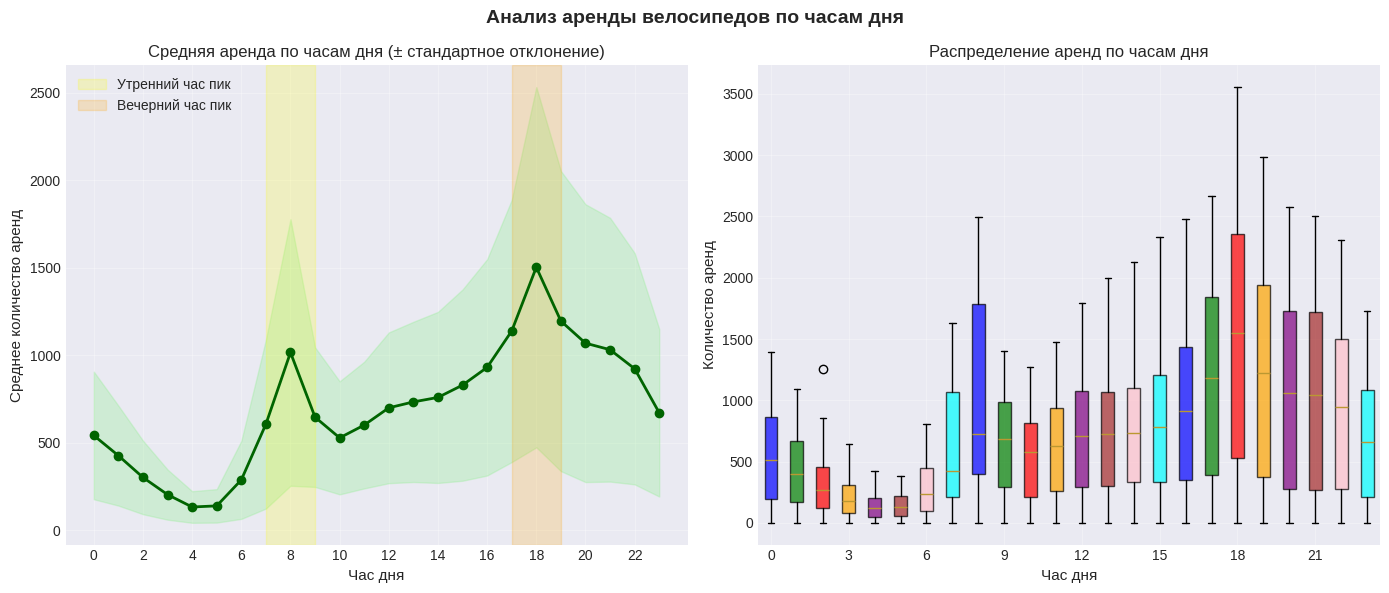

In [50]:
plt.figure(figsize=(14, 6))
plt.suptitle('Анализ аренды велосипедов по часам дня', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 1)

hours = []
means = []
stds = []

for hour in range(24):
    data_for_hour = df[df['Hour'] == hour]['Rented Bike Count']
    avg = data_for_hour.mean()
    std = data_for_hour.std()

    hours.append(hour)
    means.append(avg)
    stds.append(std)

plt.plot(hours, means, marker='o', linewidth=2, markersize=6, color='darkgreen')

upper = [means[i] + stds[i] for i in range(len(means))]
lower = [means[i] - stds[i] for i in range(len(means))]
plt.fill_between(hours, lower, upper, alpha=0.3, color='lightgreen')

plt.axvspan(7, 9, alpha=0.2, color='yellow', label='Утренний час пик')
plt.axvspan(17, 19, alpha=0.2, color='orange', label='Вечерний час пик')

plt.xlabel('Час дня', fontsize=11)
plt.ylabel('Среднее количество аренд', fontsize=11)
plt.title('Средняя аренда по часам дня (± стандартное отклонение)', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

plt.subplot(1, 2, 2)

all_hour_data = []
for hour in range(24):
    hour_data = df[df['Hour'] == hour]['Rented Bike Count']
    all_hour_data.append(hour_data)

boxplot = plt.boxplot(all_hour_data, patch_artist=True)

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown',
          'pink', 'cyan'] * 3

for i, box in enumerate(boxplot['boxes']):
    color_idx = i % len(colors)
    box.set_facecolor(colors[color_idx])
    box.set_alpha(0.7)

plt.xlabel('Час дня', fontsize=11)
plt.ylabel('Количество аренд', fontsize=11)
plt.title('Распределение аренд по часам дня', fontsize=12)
plt.xticks(range(1, 25, 3), range(0, 24, 3))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

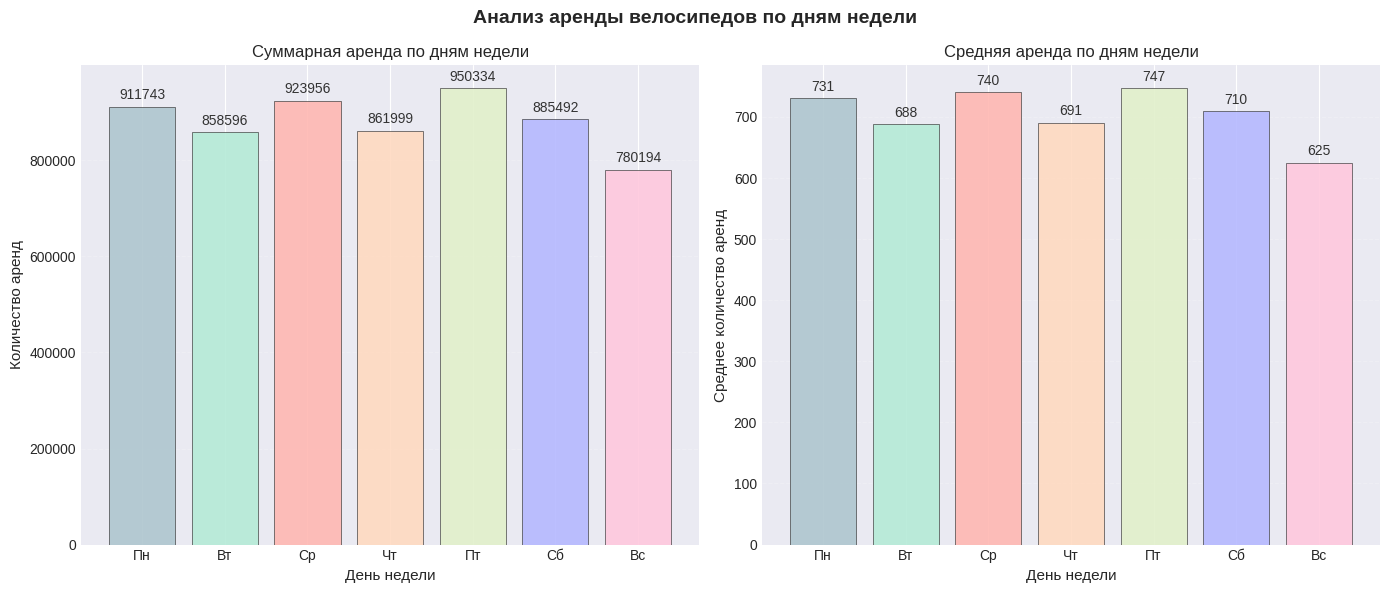

In [49]:
plt.figure(figsize=(14, 6))
plt.suptitle('Анализ аренды велосипедов по дням недели', fontsize=14, fontweight='bold')


df['Date_dt'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date_dt'].dt.dayofweek

weekday_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

pastel_bar_colors = [
    '#AEC6CF',
    '#B5EAD7',
    '#FFB7B2',
    '#FFDAC1',
    '#E2F0CB',
    '#B5B8FF',
    '#FFC8DD'
]


plt.subplot(1, 2, 1)

weekday_count = []
for day_num in range(7):
    day_data = df[df['DayOfWeek'] == day_num]['Rented Bike Count']
    count = day_data.sum()
    weekday_count.append(count)

x_positions = range(len(weekday_labels))
bars = plt.bar(x_positions, weekday_count, color=pastel_bar_colors,
               edgecolor='#333333', linewidth=0.5, alpha=0.9)

for i, (value, color) in enumerate(zip(weekday_count, pastel_bar_colors)):
    plt.text(i, value + max(weekday_count)*0.01, f'{value:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='medium',
             color='#333333')

plt.xlabel('День недели', fontsize=11)
plt.ylabel('Количество аренд', fontsize=11)
plt.title('Суммарная аренда по дням недели', fontsize=12)
plt.xticks(x_positions, weekday_labels)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')

plt.subplot(1, 2, 2)

weekday_avg = []
for day_num in range(7):
    day_data = df[df['DayOfWeek'] == day_num]['Rented Bike Count']
    avg = day_data.mean()
    weekday_avg.append(avg)

x_positions = range(len(weekday_labels))
bars = plt.bar(x_positions, weekday_avg, color=pastel_bar_colors,
               edgecolor='#333333', linewidth=0.5, alpha=0.9)

for i, (value, color) in enumerate(zip(weekday_avg, pastel_bar_colors)):
    plt.text(i, value + max(weekday_avg)*0.01, f'{round(value)}',
             ha='center', va='bottom', fontsize=10, fontweight='medium',
             color='#333333')

plt.xlabel('День недели', fontsize=11)
plt.ylabel('Среднее количество аренд', fontsize=11)
plt.title('Средняя аренда по дням недели', fontsize=12)
plt.xticks(x_positions, weekday_labels)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')

plt.tight_layout()
plt.show()

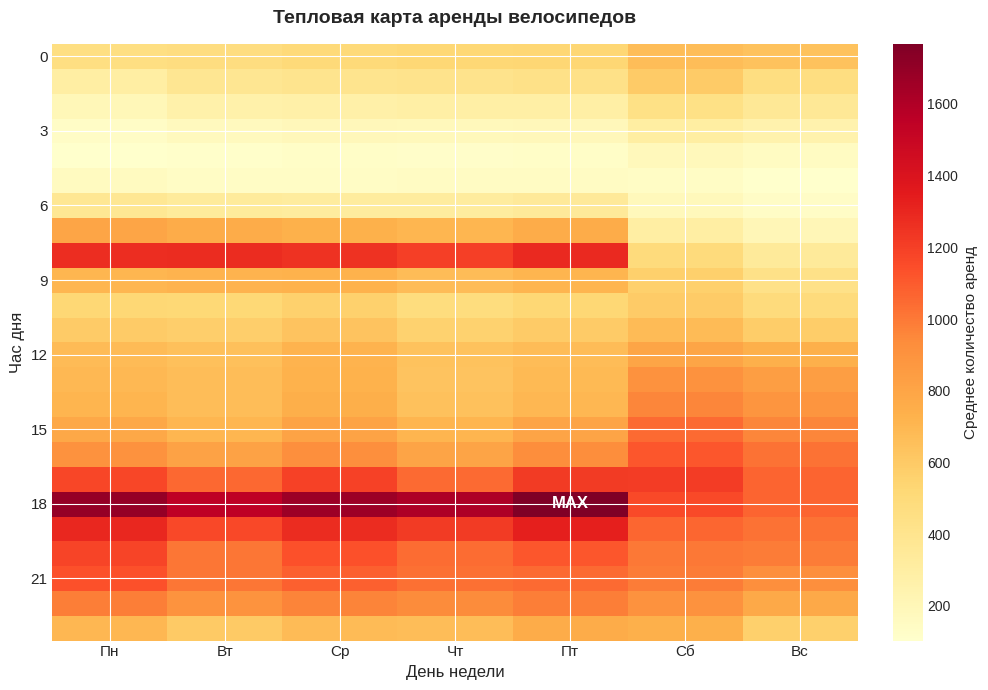

In [48]:
fig, ax = plt.subplots(figsize=(10, 7))

heatmap_data = []
for hour in range(24):
    row = []
    for day_num in range(7):
        filtered_data = df[(df['Hour'] == hour) & (df['DayOfWeek'] == day_num)]
        avg_value = filtered_data['Rented Bike Count'].mean()
        row.append(avg_value)
    heatmap_data.append(row)

heatmap = plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

ax.set_title('Тепловая карта аренды велосипедов',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Час дня', fontsize=12)

weekday_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
ax.set_xticks(range(7))
ax.set_xticklabels(weekday_labels, fontsize=11)
ax.set_yticks(range(0, 24, 3))
ax.set_yticklabels(range(0, 24, 3), fontsize=11)

cbar = fig.colorbar(heatmap, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Среднее количество аренд', fontsize=11)


max_value = 0
max_hour = 0
max_day = 0
for hour in range(24):
    for day_num in range(7):
        if heatmap_data[hour][day_num] > max_value:
            max_value = heatmap_data[hour][day_num]
            max_hour = hour
            max_day = day_num

ax.text(max_day, max_hour, 'MAX', ha='center', va='center',
        color='white', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

По графикам видно, что в утренние и вечерние час пики количество аренд увеличивается, что обсуловлено тем, что люди доезжают на велосипедах до дома или остановки общественного траспорта.

Также стоит отметить, что кол-во аренд чуть больше по понедельникам, средам и пятницам. Пик аренд приходится на вечер пятниц, что весьма логично, поскольку в этот день люди могут направляться отдыхать после работы/школы/университета.

Интересное наблюдение, что велики в основном используются только в периоды час пика. Отсюда появляется *гипотеза 1.*

#### Влияние категориальных признаков

/tmp/ipython-input-3603515329.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxes = axes[0].boxplot([df[df['Seasons']==s]['Rented Bike Count'] for s in seasons],


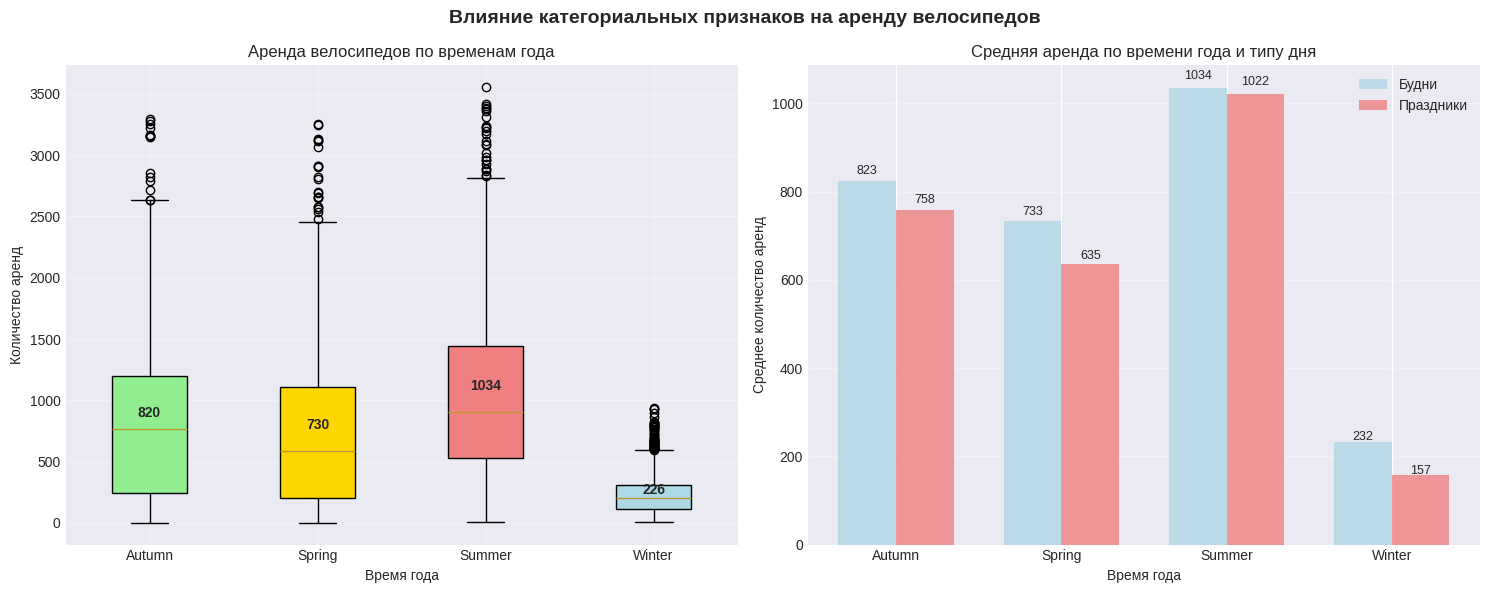

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Влияние категориальных признаков на аренду велосипедов',
             fontsize=14, fontweight='bold')

seasons = sorted(df['Seasons'].unique())

boxes = axes[0].boxplot([df[df['Seasons']==s]['Rented Bike Count'] for s in seasons],
                       patch_artist=True, labels=seasons)

for box, color in zip(boxes['boxes'], ['lightgreen', 'gold', 'lightcoral', 'lightblue']):
    box.set_facecolor(color)

means = df.groupby('Seasons')['Rented Bike Count'].mean()
for i, mean_val in enumerate(means):
    axes[0].text(i + 1, mean_val * 1.05, f'{mean_val:.0f}', ha='center', fontweight='bold')

axes[0].set(xlabel='Время года', ylabel='Количество аренд',
            title='Аренда велосипедов по временам года')
axes[0].grid(True, alpha=0.3)

#### second

grouped = df.groupby(['Seasons', 'Holiday'])['Rented Bike Count'].mean().unstack()

x = np.arange(len(seasons))
width = 0.35

axes[1].bar(x - width/2, grouped['No Holiday'], width, label='Будни',
            color='lightblue', alpha=0.8)
axes[1].bar(x + width/2, grouped['Holiday'], width, label='Праздники',
            color='lightcoral', alpha=0.8)

for i, (v1, v2) in enumerate(zip(grouped['No Holiday'], grouped['Holiday'])):
    axes[1].text(i - width/2, v1 * 1.02, f'{v1:.0f}', ha='center', fontsize=9)
    axes[1].text(i + width/2, v2 * 1.02, f'{v2:.0f}', ha='center', fontsize=9)

axes[1].set(xlabel='Время года', ylabel='Среднее количество аренд',
            title='Средняя аренда по времени года и типу дня',
            xticks=x, xticklabels=seasons)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Первый график подтверждает наблюдения, выявленные раньше, что высокая температура воздуха, которая напрямую зависит от времени года, увеличивает кол-во аренд.

На втором графике мы видим, что во все времена года велики в будни используются заметно больше, чем в летний период, что может быть обусловлено тем, что летом школьники и студенты на каникулах могут использовать велики для досуга.

#### Корреляции

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


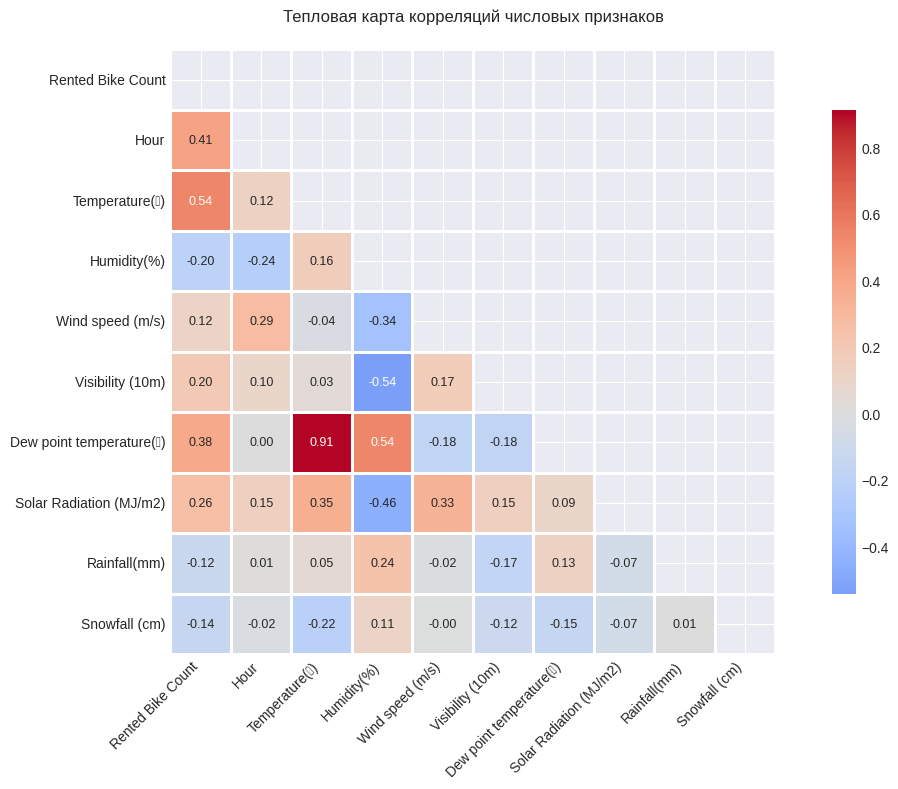

In [26]:
plt.figure(figsize=(12, 8))

numeric_cols = ['Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
                'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
                'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, annot_kws={"size": 9})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Тепловая карта корреляций числовых признаков', pad=20)

plt.tight_layout()
plt.show()

На данной карте в основном интересно посмотреть на корреляцию с кол-вом аренд. Она наблюдается с временем аренды, температурой и точкой росы. Однако, точка росы и температура очень сильно взаимосвязаны, что тепловая карта подтверждает.

Интересное наблюдение, что корреляция с температурой больше, чем корреляция со временем.

#### Совместное влиние признаков

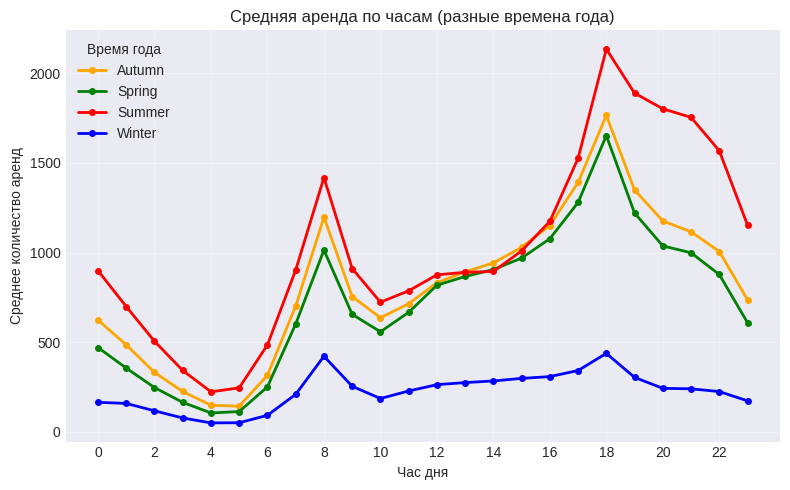

In [27]:
plt.figure(figsize=(8, 5))

seasons = sorted(df['Seasons'].unique())
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Autumn': 'orange'}

pivot_hour_season = df.pivot_table(values='Rented Bike Count',
                                     index='Hour',
                                     columns='Seasons',
                                     aggfunc='mean')

for season in seasons:
    if season in pivot_hour_season.columns:
        plt.plot(pivot_hour_season.index, pivot_hour_season[season],
                 marker='o', markersize=4, linewidth=2,
                 label=season, color=season_colors.get(season, 'gray'))

plt.xlabel('Час дня')
plt.ylabel('Среднее количество аренд')
plt.title('Средняя аренда по часам (разные времена года)')
plt.xticks(range(0, 24, 2))
plt.legend(title='Время года')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Данный график показывает, что тенденция по часам дня в разные времена года схожая, то есть все ключевые моменты одинаковы. Однако в них достигаются разные значения, с чем связано то, что велосипеды зимой заметно менее популярны, нежели в остальные времена года.

### Гипотезы

На основании проведенного разведочного анализа мы можем выдвинуть три гипотезы:

* В основном велосипеды берут в аренду в час пик для того, чтобы добраться до работы/метро.
* Температура является ключевым фактором, влияющим на кол-ва аренд.
* Выбросы по количеству аренд связаны с температурой, временем дня и днем недели.
* Влияние погодных признаков на аренды непостоянно во времени (сменяется между сезонами).

## Определение вида паспределения целевой переменной

## Логорифмирвоание для уменьшения дисперсии